# Quadratic Discriminant Analysis

There are $M$ features. Let the features of samples in class $C_i$ be normally distributed with mean $\boldsymbol{\mu}_i$ and variance $\boldsymbol{\Sigma}_i$, $i = 0,1$. Let $\mathbf{v}$ be a feature vector. The likelihood of $\mathbf{v} \in C_i$ given that we know its features $\mathbf{v}$ is:
\begin{equation}
\mathcal{L}(\mathbf{v} \in C_i | \mathbf{v}) = \frac{1}{\sqrt{(2 \pi)^M | \boldsymbol{\Sigma}_i |}} \exp \left( - \frac{1}{2} (\mathbf{v} - \boldsymbol{\mu}_i)^T \boldsymbol{\Sigma}_i^{-1} (\mathbf{v} - \boldsymbol{\mu}_i) \right).
\end{equation}

A classifier can be built, by assigning $\mathbf{v}$ to class $C_0$ if the likelihood of it belonging to $C_0$ is larger than the likelihood of it belonging to $C_1$. The boundary between the classes is given by
\begin{equation}
\frac{\mathcal{L}(\mathbf{v} \in C_0 | \mathbf{v})} {\mathcal{L}(\mathbf{v} \in C_1 | \mathbf{v})} =  \frac{\sqrt{(2 \pi)^M | \boldsymbol{\Sigma}_1 |} \exp \left( - \frac{1}{2} (\mathbf{v} - \boldsymbol{\mu}_0)^T \boldsymbol{\Sigma}_0^{-1} (\mathbf{v} - \boldsymbol{\mu}_0) \right)} {\sqrt{(2 \pi)^M | \boldsymbol{\Sigma}_0 |} \exp \left( - \frac{1}{2} (\mathbf{v} - \boldsymbol{\mu}_1)^T \boldsymbol{\Sigma}_1^{-1} (\mathbf{v} - \boldsymbol{\mu}_1) \right)}= 1.
\end{equation}
Taking the logarithm, we arrive at
\begin{equation}
\begin{array}{rcl}
\displaystyle \log \frac{\mathcal{L}(\mathbf{v} \in C_0 | \mathbf{v})} {\mathcal{L}(\mathbf{v} \in C_1 | \mathbf{v})} \! & \! = \! & \! \displaystyle \frac{1}{2} \log \frac{| \boldsymbol{\Sigma}_1 |} {| \boldsymbol{\Sigma}_0 |} - \frac{1}{2} (\mathbf{v} - \boldsymbol{\mu}_0)^T \boldsymbol{\Sigma}_0^{-1} (\mathbf{v} - \boldsymbol{\mu}_0) \\
\! & \!\! & \! \displaystyle + \frac{1}{2} (\mathbf{v} - \boldsymbol{\mu}_1)^T \boldsymbol{\Sigma}_1^{-1} (\mathbf{v} - \boldsymbol{\mu}_1) \\
\! & \! = \! & \! \displaystyle \frac{1}{2} \left( \log \frac{| \boldsymbol{\Sigma}_1 |} {| \boldsymbol{\Sigma}_0 |} + \boldsymbol{\mu}_1^T \boldsymbol{\Sigma}_1^{-1} \boldsymbol{\mu}_1 - \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\mu}_0 \right) \\
\! & \!\! & \! \displaystyle + \mathbf{v}^T \left( \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\mu}_0- \boldsymbol{\Sigma}_1^{-1} \boldsymbol{\mu}_1 \right) + \frac{1}{2} \mathbf{v}^T \left( \boldsymbol{\Sigma}_1^{-1} - \boldsymbol{\Sigma}_0^{-1} \right) \mathbf{v} = 0.
\end{array}
\end{equation}
Thus the boundary between classes is given by a quadratic of the form
\begin{equation}
\mathbf{v}^T \mathbf{A} \mathbf{v} + \mathbf{v}^T \mathbf{b} + c = 0
\end{equation}
with
\begin{equation}
\begin{array}{rcl}
\mathbf{A} & = & \displaystyle \frac{1}{2} \left( \boldsymbol{\Sigma}_1^{-1} - \boldsymbol{\Sigma}_0^{-1} \right), \\
\mathbf{b} & = & \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\mu}_0- \boldsymbol{\Sigma}_1^{-1} \boldsymbol{\mu}_1, \\
c & = & \displaystyle \frac{1}{2} \left( \log \frac{| \boldsymbol{\Sigma}_1 |} {| \boldsymbol{\Sigma}_0 |} + \boldsymbol{\mu}_1^T \boldsymbol{\Sigma}_1^{-1} \boldsymbol{\mu}_1 - \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\mu}_0 \right).
\end{array}
\end{equation}

The below code uses the sklearn implementation. Using the formulae above, implement the QDA directly.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
d = datasets.load_iris()
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# Iris virginica stored in the next 50 entries.

# Create a classification instance of the QDA.
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# We consider petal length and width, the third and forth features.
# We train on the entire data.
# Number of samples, and therefore species.
# Two: 100,
# Three: 150
n = 150
X = d.data[0:n, 2:4] # Features 3 and 4.
y = d.target[0:n]
# Fit model.
qda.fit(X, y)

# Covariance matrices:
cov = qda.covariance_
# Means:
m = qda.means_

print('Covariance matrices: ', cov)
print('Means: ', m)

Covariance matrices:  [array([[0.03015918, 0.00606939],
       [0.00606939, 0.01110612]]), array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]]), array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])]
Means:  [[1.462 0.246]
 [4.26  1.326]
 [5.552 2.026]]


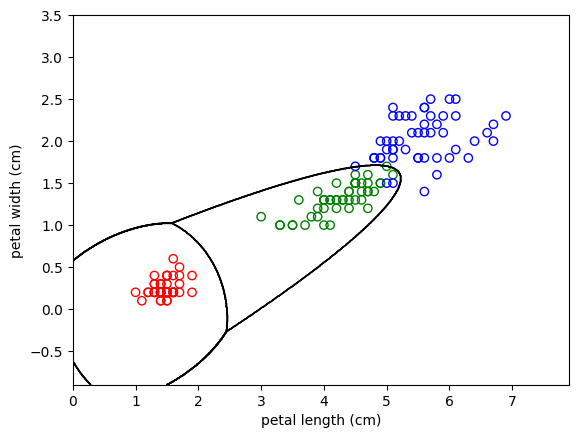

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
# Draw decision boundaries.
disp = DecisionBoundaryDisplay.from_estimator(
    qda, X, grid_resolution =1000,
    response_method="predict",
    plot_method = 'contour',
    xlabel=d.feature_names[2], ylabel=d.feature_names[3],
    colors = 'k',
    linewidths = 1
)
# Display data.
disp.ax_.scatter(X[:,0], X[:,1],
                     facecolors = 'none',
                     edgecolors = colours[0:n])
plt.show()